<a href="https://colab.research.google.com/github/Beagan19/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions
Brooke Eagan


## Loading Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
food_sales_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/sales_predictions.xlsx')
food_sales_df.info()
food_sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaming

In [ ]:
# number of rows and columns
food_sales_df.shape

(8523, 12)

In [ ]:
#data types
food_sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# duplicate rows
duplicate = food_sales_df.duplicated()
duplicate.sum()

0

In [ ]:
# check missing values
food_sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# replacing missing item weights with average item weight
avg_item_weight = food_sales_df["Item_Weight"].mean()
food_sales_df['Item_Weight'].fillna(avg_item_weight, inplace=True)
food_sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# create new category "Unknown" for missing outlet size data
food_sales_df["Outlet_Size"].fillna("Unknown", inplace=True)
food_sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# find and fix inconsistent categories
food_sales_df["Item_Fat_Content"].value_counts()
food_sales_df["Item_Fat_Content"] = food_sales_df["Item_Fat_Content"].replace('LF', 'Low Fat')
food_sales_df["Item_Fat_Content"] = food_sales_df["Item_Fat_Content"].replace('low fat', 'Low Fat')
food_sales_df["Item_Fat_Content"] = food_sales_df["Item_Fat_Content"].replace('reg', 'Regular')
food_sales_df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# summary stats for numerical columns
food_sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

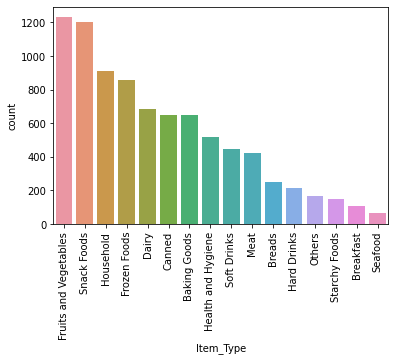

In [ ]:
# bar graph for item types
sns.countplot(data = food_sales_df, x = 'Item_Type', order=food_sales_df['Item_Type'].value_counts().index)
plt.xticks(rotation=90)

Fruits and vegatables and snack foods are sold the most. Seafood is sold the least.

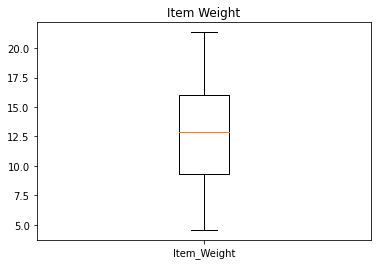

In [ ]:
# boxplot for item weight
plt.boxplot(food_sales_df['Item_Weight'], labels= ['Item_Weight'])
plt.title('Item Weight');

There is an equal range of distribrution.

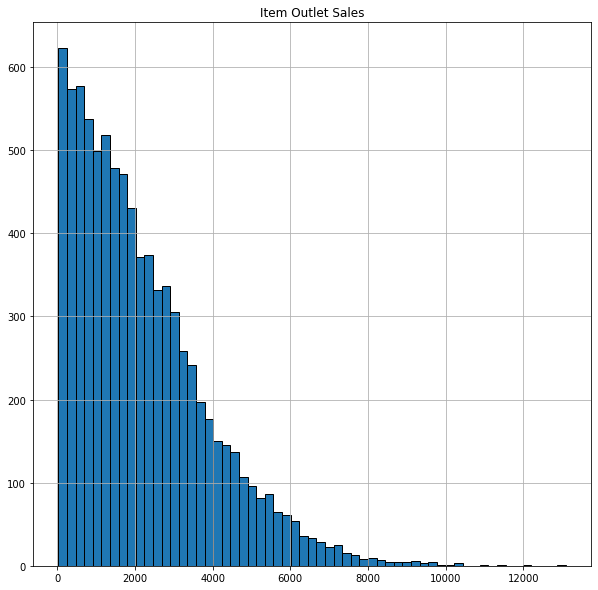

In [ ]:
# histogram for item outlet sales
plt.figure(figsize= (10,10))
food_sales_df['Item_Outlet_Sales'].hist(bins = 'auto', edgecolor = 'black')
plt.title('Item Outlet Sales');

The most item outlet sales are between 0 and 200.

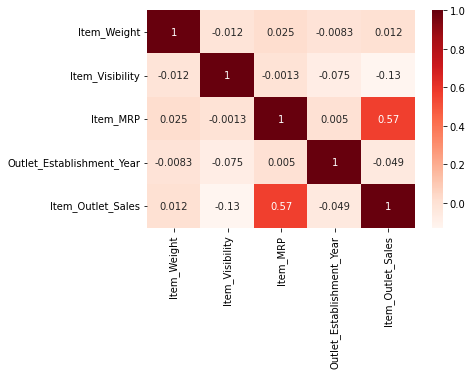

In [ ]:
# heat map for sales predictions
corr = food_sales_df.corr()
sns.heatmap(corr, cmap = 'Reds', annot = True);

There is a moderate correlation between item outlet sales and item MRP.

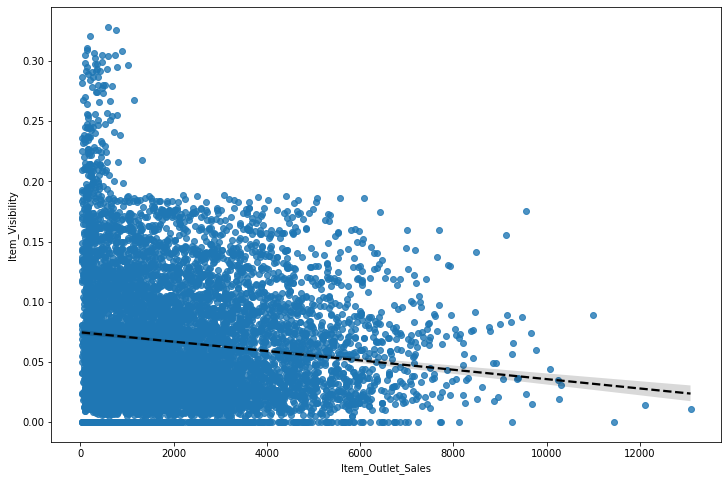

In [ ]:
# regression plot for item visibility and item outlet sales
plt.figure(figsize = (12, 8))
sns.regplot(data = food_sales_df, x = 'Item_Outlet_Sales', y = 'Item_Visibility', line_kws={'color': 'black', 'ls': '--'});

There is a low negative correlation between item outlet sales and item visibility.

## Explanatory Visuals

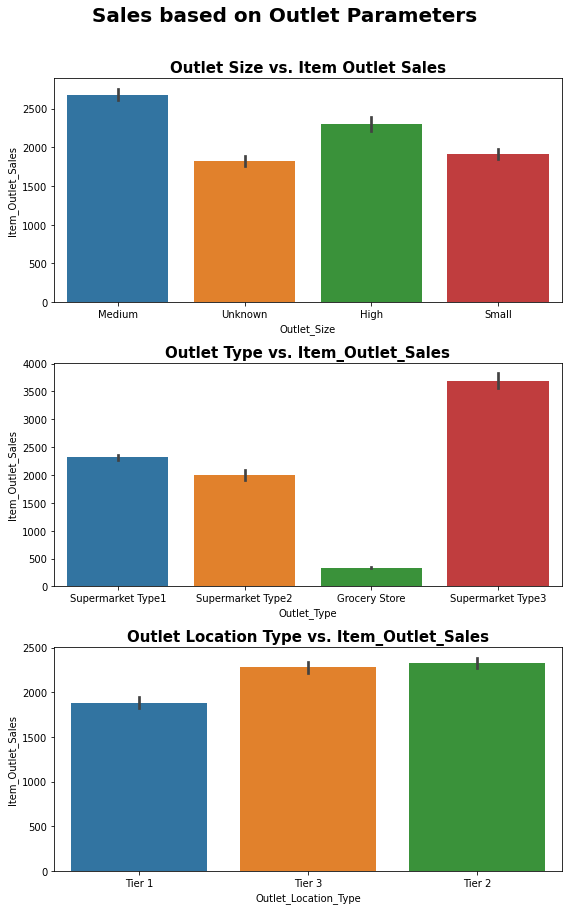

In [ ]:
fig, axes = plt.subplots(nrows = 3, figsize = (8,12))

sns.barplot(data = food_sales_df, x = 'Outlet_Size', y = 'Item_Outlet_Sales', ax = axes[0])
axes[0].set_title('Outlet Size vs. Item Outlet Sales', fontsize = 15, fontweight = 'bold')

sns.barplot(data = food_sales_df, x = 'Outlet_Type', y = 'Item_Outlet_Sales', ax = axes[1])
axes[1].set_title('Outlet Type vs. Item_Outlet_Sales', fontsize = 15, fontweight = 'bold')

sns.barplot(data = food_sales_df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', ax = axes[2])
axes[2].set_title('Outlet Location Type vs. Item_Outlet_Sales', fontsize = 15, fontweight = 'bold')

fig.suptitle('Sales based on Outlet Parameters', fontsize = 20, fontweight = 'bold', y = 1.05)

fig.tight_layout()

Based on three different outlet parameters, medium outlet size, supermarket type 3, and outlet location type tier 2 have the highest item outlet sales.

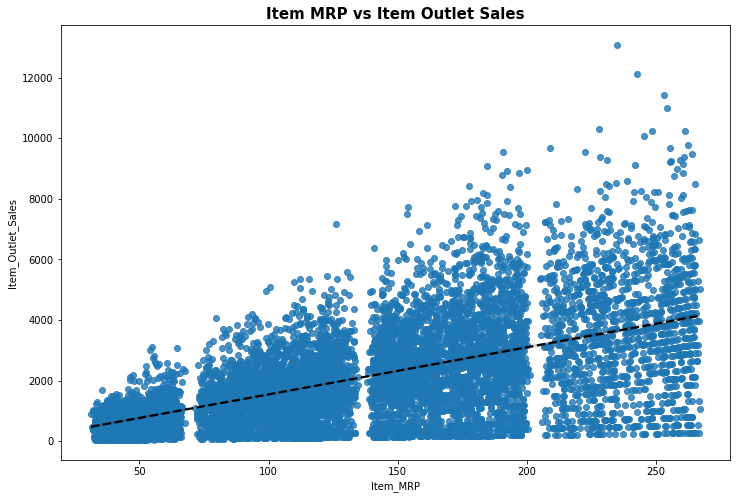

In [ ]:
# regression plot for item MRP and item outlet sales
plt.figure(figsize = (12, 8))
sns.regplot(data = food_sales_df, x = 'Item_MRP', y = 'Item_Outlet_Sales',  line_kws={'color': 'black', 'ls': '--'})
plt.title('Item MRP vs Item Outlet Sales', fontsize = 15, fontweight = 'bold');

There is a moderate positive correlation between item maximum retail price and item outlet sales.